In [1]:
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa
from IPython.display import Audio
import os, os.path
%matplotlib inline
# from sklearn.preprocessing import MultiLabelBinarizer
import cPickle
# import matplotlib.pyplot as plt
# from pybrain.tools.shortcuts import buildNetwork as bN

C:\Users\Ben\Anaconda\envs\eecs352\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [ ]:
# y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]
# a=MultiLabelBinarizer().fit_transform(y)

In [ ]:
# plt.scatter(xrange(len(a)*len(a[0])),a[:][:])
# plt.show()

In [ ]:
# net = bN(2,3,1)

In [ ]:
# net.activate([22,1])

In [ ]:
librosa_loader = librosa.load

In [ ]:
directory_names = ['Screams','Bangs and other manmade sounds','Singing','Birds']
screams,singing,birds,bangs = [],[],[],[]
my_sounds = {"Screams":screams,"Singing":singing,"Birds":birds,"Bangs and other manmade sounds":bangs}
print(my_sounds)
# bangs.append(234523)
# my_sounds["Screams"].append("plants")
print(my_sounds)
for key in my_sounds:
    print(key in os.listdir("."))


In [ ]:
for folder in directory_names:
    for sound_file in os.listdir(folder):
        print("folder: ",folder," sound_file: ",sound_file)
        sound,sr = (librosa_loader((folder+'/'+sound_file)))
        my_sounds[folder].append((sound,sr))

In [2]:
my_sounds = cPickle.load(open("my_sounds.pkl",'r'))

In [4]:
Audio(my_sounds["Screams"][0][0],rate=my_sounds["Screams"][0][1])

In [8]:
MFCC = librosa.feature.mfcc(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])

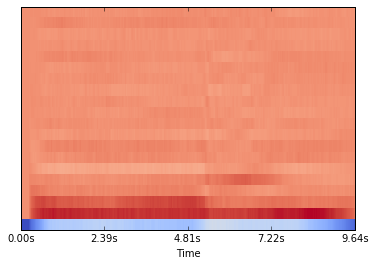

In [9]:
librosa.display.specshow(MFCC,x_axis='time')

In [12]:
CHROMA0 = librosa.feature.chromagram(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])
CHROMA1 = librosa.feature.chroma_stft(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])

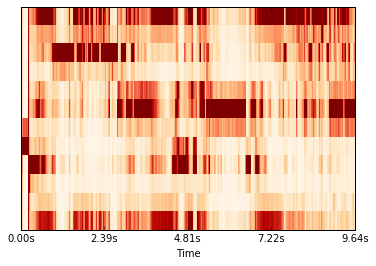

In [13]:
librosa.display.specshow(CHROMA0,x_axis='time')

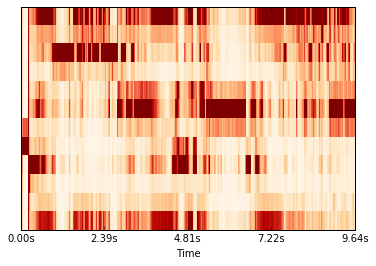

In [14]:
librosa.display.specshow(CHROMA0,x_axis='time')

In [15]:
ScreamsCHROMA0 = librosa.feature.chromagram(y=my_sounds['Screams'][0][0], sr=my_sounds['Screams'][0][1])

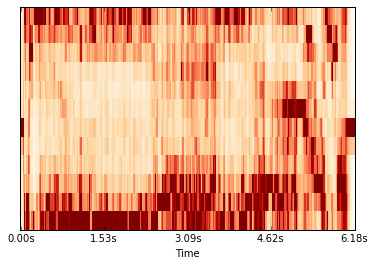

In [16]:
librosa.display.specshow(ScreamsCHROMA0,x_axis='time')

AttributeError: 'numpy.ndarray' object has no attribute 'show'

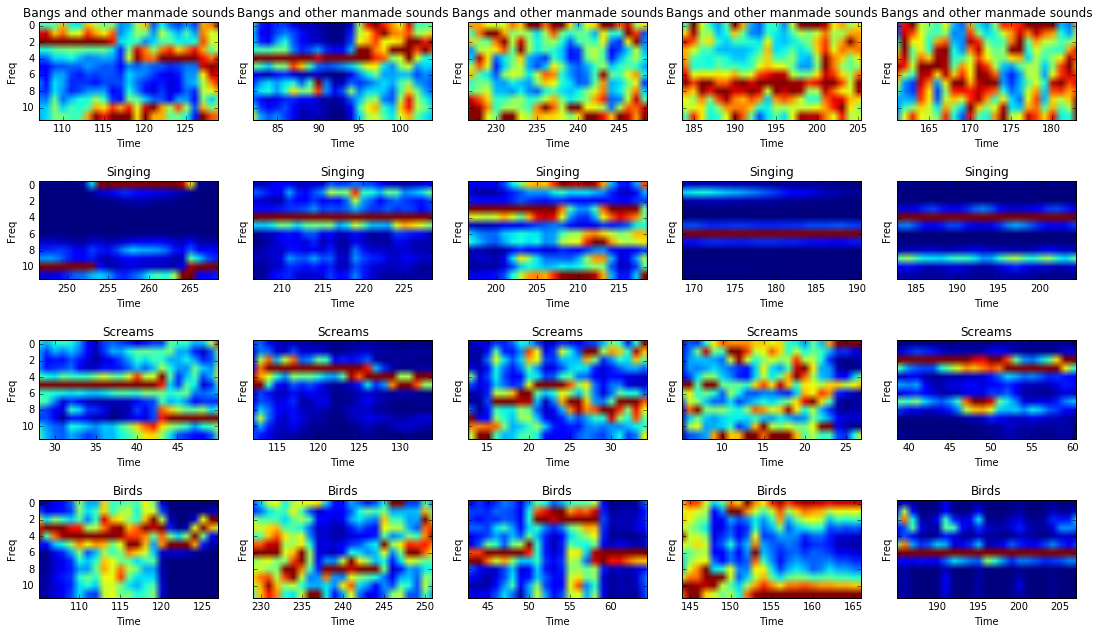

In [61]:
# subplot(nrows, ncols, plot_number)

# plt.figure()
# plt.figure(figsize=(18,6))
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        my_chroma = librosa.feature.chromagram(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Pitch")
        axes[j].imshow(my_chroma)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

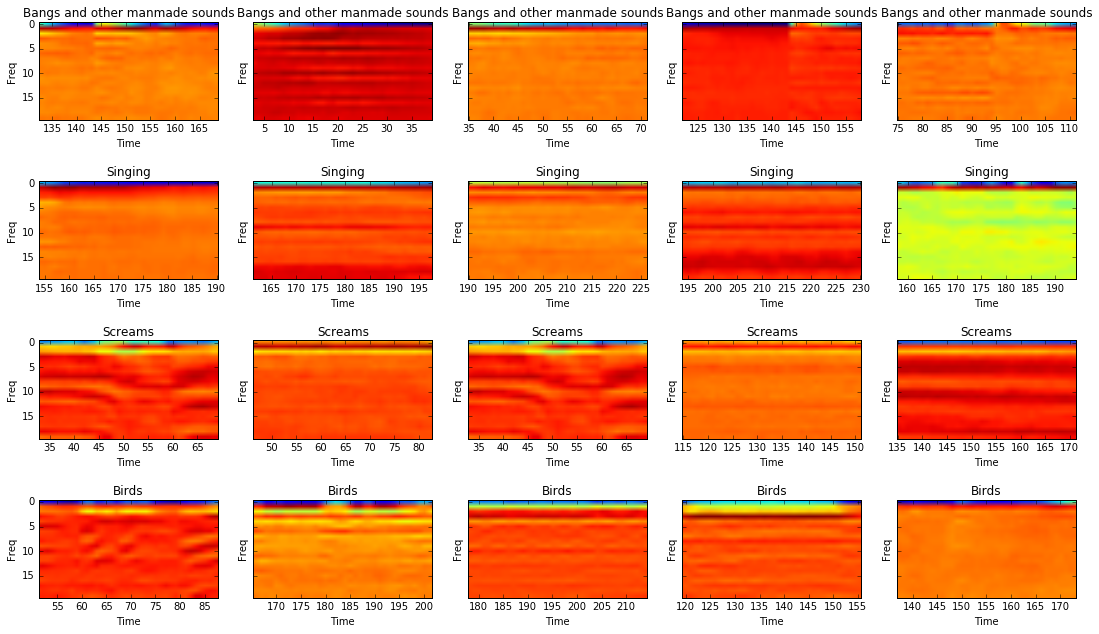

In [62]:
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        my_mfcc = librosa.feature.mfcc(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Freq")
        axes[j].imshow(my_mfcc)
        i += 1
        j += 1
        
axes.show()

In [69]:
# import bz2,json,contextlib
# cPickle.dump(my_sounds,open("out.pkl","w"))
## data = bz2.compress(my_sounds,9)
# with contextlib.closing(bz2.BZ2File('data.json.bz2', 'wb')) as f:
#     cPickle.dump(my_sounds, f)
## with open("out.bz2","w") as outfile:
##     outfile.write(data)
##     bz2.compress(outfile,9)